In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re

def graph_mtree(name_file):
    cmap = plt.cm.viridis

    # Function to parse the custom data format
    def parse_data(row):
        p_match = re.search(r'p:\(([^)]+)\)', row)
        h_match = re.search(r'h:(\d+)', row)
        n_match = re.search(r'n:(\d+)', row)
        cr_match = re.search(r'cr:(\d+.\d+)', row)
        if (not cr_match):
            cr_match = re.search(r'cr:(\d+)', row)

        if not (p_match and h_match and cr_match and n_match):
            return None  # Return None if any patterns do not match
        
        p = tuple(map(float, p_match.group(1).split(',')))
        h = int(h_match.group(1))
        cr = float(cr_match.group(1))
        n = int(n_match.group(1))
        return p, h, cr, n

    # Read the CSV file
    df = pd.read_csv(name_file, header=None, delimiter=";")

    # Prepare the plot
    fig, ax = plt.subplots(figsize=(14, 14))

    # Find min and max h values for normalization
    min_h = df[0].apply(lambda x: int(re.search(r'h:(\d+)', x).group(1))).min()
    max_h = df[0].apply(lambda x: int(re.search(r'h:(\d+)', x).group(1))).max()
    norm = mcolors.Normalize(vmin=min_h, vmax=max_h)

    # Process each row in the DataFrame
    for index, row in df.iterrows():
        result = parse_data(row[0])
        if result:
            p, h, cr, n = result

            if n == 0:
                markersize = 8
                ax.plot(p[0], p[1], 'bo', markersize=markersize)
            else:
                color = cmap(norm(h))
                circle = plt.Circle(p, cr, color=color, fill=False)  # Draw a red circle for n!=0
                ax.add_artist(circle)

    # Set equal scaling by setting the aspect ratio to 'equal'
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.show()


In [10]:
import pandas as pd
import numpy as np
import os
from scipy.stats import norm

def read_data(file_path):
    """Reads a CSV file and extracts the numeric data."""
    data = pd.read_csv(file_path, header=None, sep=':')
    return data[1].values

def calculate_confidence_interval(data, confidence=0.95):
    """Calculates the confidence interval for a given dataset."""
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    z_score = norm.ppf((1 + confidence) / 2)  # Get z-score from the normal distribution
    margin_error = z_score * (std_dev / np.sqrt(n))
    return mean, mean - margin_error, mean + margin_error

def process_files(sizes):
    results = {}
    for size in sizes:
        file = f"mtree_cp_search_{size}.csv"
        data = read_data(file)
        mean, lower_bound, upper_bound = calculate_confidence_interval(data)
        results[file] = {'Mean': mean, '95% CI Lower': lower_bound, '95% CI Upper': upper_bound}
    return results



File: mtree_cp_search_10.csv, Mean: 89.08, 95% CI: (84.14409712801944, 94.01590287198056)


In [15]:
sizes = [10, 14]
ci_results = process_files(sizes)
for file, stats in ci_results.items():
    print(f"File: {file}, Mean: {stats['Mean']}, 95% CI: ({stats['95% CI Lower']}, {stats['95% CI Upper']})")

File: mtree_cp_search_10.csv, Mean: 89.08, 95% CI: (84.14409712801944, 94.01590287198056)
File: mtree_cp_search_14.csv, Mean: 6257.04, 95% CI: (5672.45902633951, 6841.62097366049)


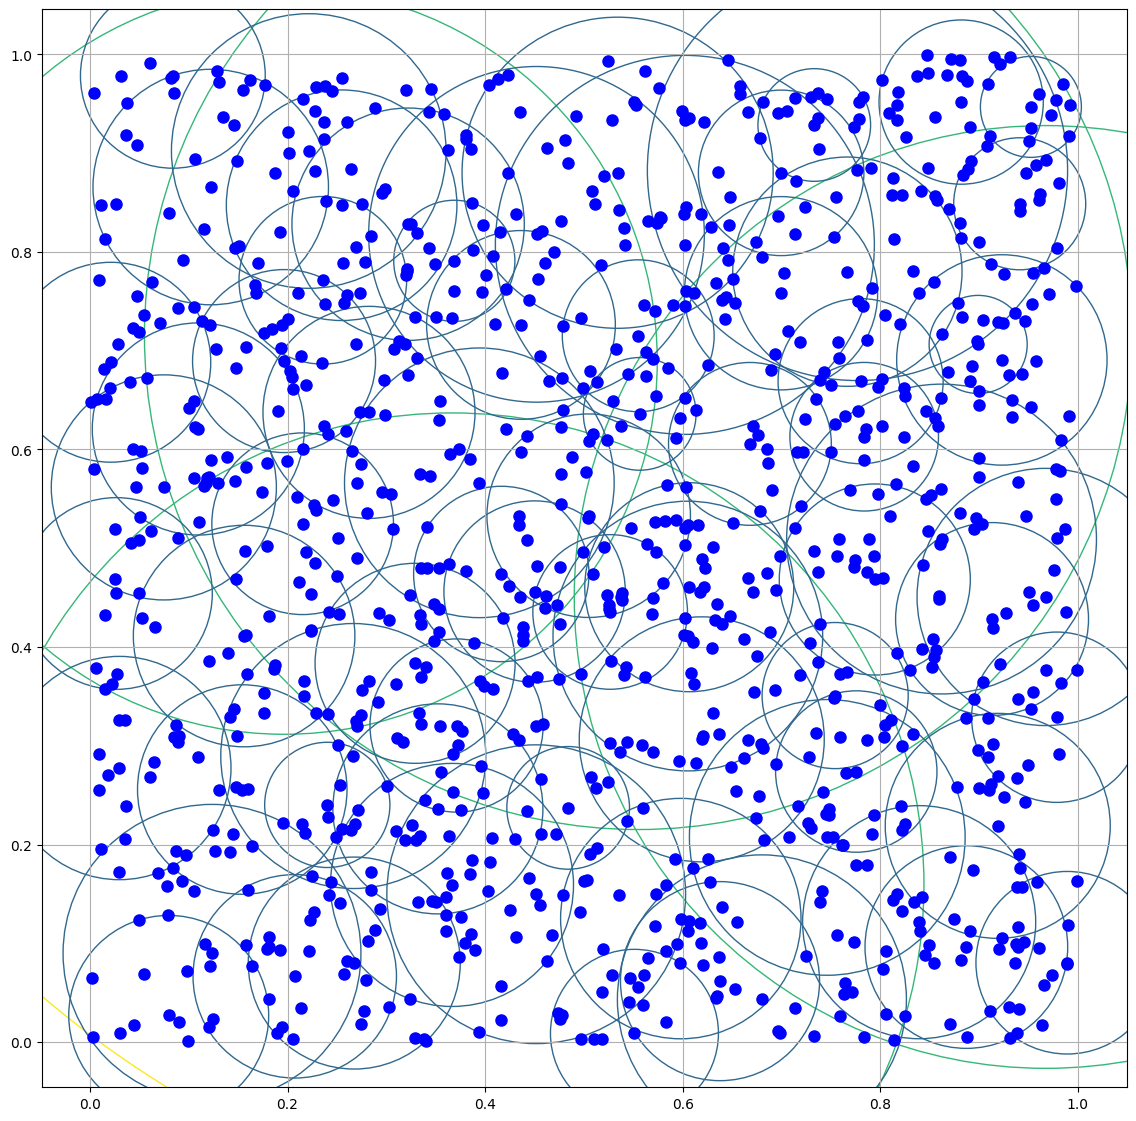

In [17]:
for size in [10]:
    graph_mtree(f"mtree_cp_{size}.csv")
